In [1]:
!pip install pycocotools

In [2]:
import numpy as np 
import pandas as pd
import os
import cv2
# visualization
import matplotlib.pyplot as plt
from matplotlib import patches as patches
# plotly offline imports
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot
from plotly import subplots
import plotly.express as px
import plotly.figure_factory as ff
from plotly.graph_objs import *
from plotly.graph_objs.layout import Margin, YAxis, XAxis
init_notebook_mode()
# frequent pattern mining


from pycocotools.coco import COCO
from pycocotools.mask import encode,decode,area,toBbox

import json

In [ ]:
# data_path = '../input/understanding_cloud_organization'
# train_csv_path = os.path.join(data_path,'train.csv')
# train_image_path = os.path.join(data_path,'train_images')

data_path = '/content/drive/MyDrive'
train_csv_path = os.path.join(data_path,'train.csv')
train_image_path = os.path.join(data_path,'vinbig_yolo')
metadata=pd.read_csv("/content/drive/MyDrive/YOLOv4/train_dicom_metadata.csv")

data = pd.read_csv(train_csv_path)

In [ ]:
data=data.drop('rad_id',axis=1)
data.head()

,image_id,class_name,class_id,x_min,y_min,x_max,y_max
0,50a418190bc3fb1ef1633bf9678929b3,No finding,14,NaN,NaN,NaN,NaN
1,21a10246a5ec7af151081d0cd6d65dc9,No finding,14,NaN,NaN,NaN,NaN
2,9a5094b2563a1ef3ff50dc5c7ff71345,Cardiomegaly,3,691.0,1375.0,1653.0,1831.0
3,051132a778e61a86eb147c7c6f564dfe,Aortic enlargement,0,1264.0,743.0,1611.0,1019.0
4,063319de25ce7edb9b1c6b8881290140,No finding,14,NaN,NaN,NaN,NaN


In [ ]:
metadata=pd.DataFrame(metadata.filter(['image_id','Rows','Columns']))
metadata.head()

,image_id,Rows,Columns
0,289f69f6462af4933308c275d07060f0,3072,3072
1,68335ee73e67706aa59b8b55b54b11a4,2836,2336
2,7ecd6f67f649f26c05805c8359f9e528,2952,2744
3,2229148faa205e881cf0d932755c9e40,2880,2304
4,8c87779485ae5e21e25cb57e9510e149,3170,2642


In [ ]:
df_1=pd.merge(data,metadata,on='image_id')
df_1.head()
df_1["class_id"] = df_1["class_id"] + 1

In [ ]:
df_1[:50]

,image_id,class_name,class_id,x_min,y_min,x_max,y_max,Rows,Columns
0,50a418190bc3fb1ef1633bf9678929b3,No finding,15,NaN,NaN,NaN,NaN,2580,2332
1,50a418190bc3fb1ef1633bf9678929b3,No finding,15,NaN,NaN,NaN,NaN,2580,2332
2,50a418190bc3fb1ef1633bf9678929b3,No finding,15,NaN,NaN,NaN,NaN,2580,2332
3,21a10246a5ec7af151081d0cd6d65dc9,No finding,15,NaN,NaN,NaN,NaN,3159,2954
4,21a10246a5ec7af151081d0cd6d65dc9,No finding,15,NaN,NaN,NaN,NaN,3159,2954
5,21a10246a5ec7af151081d0cd6d65dc9,No finding,15,NaN,NaN,NaN,NaN,3159,2954
6,9a5094b2563a1ef3ff50dc5c7ff71345,Cardiomegaly,4,691.0,1375.0,1653.0,1831.0,2336,2080
7,9a5094b2563a1ef3ff50dc5c7ff71345,Pleural effusion,11,1789.0,1729.0,1875.0,1992.0,2336,2080
8,9a5094b2563a1ef3ff50dc5c7ff71345,Pleural thickening,12,1789.0,1729.0,1875.0,1992.0,2336,2080
9,9a5094b2563a1ef3ff50dc5c7ff71345,Cardiomegaly,4,692.0,1375.0,1657.0,1799.0,2336,2080


In [ ]:
df_1.loc[df_1.class_id == 15, "class_id"] = 0

In [ ]:
df_1[:10]

,image_id,class_name,class_id,x_min,y_min,x_max,y_max,Rows,Columns
0,50a418190bc3fb1ef1633bf9678929b3,No finding,0,NaN,NaN,NaN,NaN,2580,2332
1,50a418190bc3fb1ef1633bf9678929b3,No finding,0,NaN,NaN,NaN,NaN,2580,2332
2,50a418190bc3fb1ef1633bf9678929b3,No finding,0,NaN,NaN,NaN,NaN,2580,2332
3,21a10246a5ec7af151081d0cd6d65dc9,No finding,0,NaN,NaN,NaN,NaN,3159,2954
4,21a10246a5ec7af151081d0cd6d65dc9,No finding,0,NaN,NaN,NaN,NaN,3159,2954
5,21a10246a5ec7af151081d0cd6d65dc9,No finding,0,NaN,NaN,NaN,NaN,3159,2954
6,9a5094b2563a1ef3ff50dc5c7ff71345,Cardiomegaly,4,691.0,1375.0,1653.0,1831.0,2336,2080
7,9a5094b2563a1ef3ff50dc5c7ff71345,Pleural effusion,11,1789.0,1729.0,1875.0,1992.0,2336,2080
8,9a5094b2563a1ef3ff50dc5c7ff71345,Pleural thickening,12,1789.0,1729.0,1875.0,1992.0,2336,2080
9,9a5094b2563a1ef3ff50dc5c7ff71345,Cardiomegaly,4,692.0,1375.0,1657.0,1799.0,2336,2080


In [ ]:
df_1.loc[df_1.class_id == 0, "x_min"] = 0.0
df_1.loc[df_1.class_id == 0, "y_min"] = 0.0
df_1.loc[df_1.class_id == 0, "x_max"] = 0.0
df_1.loc[df_1.class_id == 0, "y_max"] = 0.0
df_1[:10]

,image_id,class_name,class_id,x_min,y_min,x_max,y_max,Rows,Columns
0,50a418190bc3fb1ef1633bf9678929b3,No finding,0,0.0,0.0,0.0,0.0,2580,2332
1,50a418190bc3fb1ef1633bf9678929b3,No finding,0,0.0,0.0,0.0,0.0,2580,2332
2,50a418190bc3fb1ef1633bf9678929b3,No finding,0,0.0,0.0,0.0,0.0,2580,2332
3,21a10246a5ec7af151081d0cd6d65dc9,No finding,0,0.0,0.0,0.0,0.0,3159,2954
4,21a10246a5ec7af151081d0cd6d65dc9,No finding,0,0.0,0.0,0.0,0.0,3159,2954
5,21a10246a5ec7af151081d0cd6d65dc9,No finding,0,0.0,0.0,0.0,0.0,3159,2954
6,9a5094b2563a1ef3ff50dc5c7ff71345,Cardiomegaly,4,691.0,1375.0,1653.0,1831.0,2336,2080
7,9a5094b2563a1ef3ff50dc5c7ff71345,Pleural effusion,11,1789.0,1729.0,1875.0,1992.0,2336,2080
8,9a5094b2563a1ef3ff50dc5c7ff71345,Pleural thickening,12,1789.0,1729.0,1875.0,1992.0,2336,2080
9,9a5094b2563a1ef3ff50dc5c7ff71345,Cardiomegaly,4,692.0,1375.0,1657.0,1799.0,2336,2080


In [ ]:
df_1['x_min'] = ((df_1['x_min'] / df_1['Columns']) * 1024)
df_1['y_min'] = ((df_1['y_min'] / df_1['Rows']) * 1024)
df_1['x_max'] = ((df_1['x_max'] / df_1['Columns']) * 1024)
df_1['y_max'] = ((df_1['y_max'] / df_1['Rows']) * 1024)

In [ ]:
df_1[:50]

,image_id,class_name,class_id,x_min,y_min,x_max,y_max,Rows,Columns
0,50a418190bc3fb1ef1633bf9678929b3,No finding,0,0.000000,0.000000,0.000000,0.000000,2580,2332
1,50a418190bc3fb1ef1633bf9678929b3,No finding,0,0.000000,0.000000,0.000000,0.000000,2580,2332
2,50a418190bc3fb1ef1633bf9678929b3,No finding,0,0.000000,0.000000,0.000000,0.000000,2580,2332
3,21a10246a5ec7af151081d0cd6d65dc9,No finding,0,0.000000,0.000000,0.000000,0.000000,3159,2954
4,21a10246a5ec7af151081d0cd6d65dc9,No finding,0,0.000000,0.000000,0.000000,0.000000,3159,2954
5,21a10246a5ec7af151081d0cd6d65dc9,No finding,0,0.000000,0.000000,0.000000,0.000000,3159,2954
6,9a5094b2563a1ef3ff50dc5c7ff71345,Cardiomegaly,4,340.184615,602.739726,813.784615,802.630137,2336,2080
7,9a5094b2563a1ef3ff50dc5c7ff71345,Pleural effusion,11,880.738462,757.917808,923.076923,873.205479,2336,2080
8,9a5094b2563a1ef3ff50dc5c7ff71345,Pleural thickening,12,880.738462,757.917808,923.076923,873.205479,2336,2080
9,9a5094b2563a1ef3ff50dc5c7ff71345,Cardiomegaly,4,340.676923,602.739726,815.753846,788.602740,2336,2080


In [ ]:
import numpy as np
import json
import pandas as pd

# path = '/content/drive/MyDrive/train.csv'
save_json_path = '/content/train.json'

data = df_1

images = []
categories = []
annotations = []

# category = {}
# category["supercategory"] = 'none'
# category["id"] = 0
# category["name"] = 'None'
# categories.append(category)

data['fileid'] = data['image_id'].astype('category').cat.codes
data['categoryid']= pd.Categorical(data['class_id'],ordered= True).codes
data['categoryid'] = data['categoryid']
data['annid'] = data.index

def image(row):
    image = {}
    image["height"] = 1024
    image["width"] = 1024
    image["id"] = row.fileid
    image["file_name"] = row.image_id
    return image

def category(row):
    category = {}
    category["supercategory"] = 'None'
    category["id"] = row.categoryid
    category["name"] = row[2]
    return category

def annotation(row):
    annotation = {}
    area = (row.x_max -row.x_min)*(row.y_max - row.y_min)
    annotation["segmentation"] = []
    annotation["iscrowd"] = 0
    annotation["area"] = area
    annotation["image_id"] = row.fileid

    annotation["bbox"] = [row.x_min, row.y_min, row.x_max -row.x_min,row.y_max-row.y_min ]

    annotation["category_id"] = row.categoryid
    annotation["id"] = row.annid
    return annotation

for row in data.itertuples():
    annotations.append(annotation(row))

imagedf = data.drop_duplicates(subset=['fileid']).sort_values(by='fileid')
for row in imagedf.itertuples():
    images.append(image(row))

catdf = data.drop_duplicates(subset=['categoryid']).sort_values(by='categoryid')
for row in catdf.itertuples():
    categories.append(category(row))

data_coco = {}
data_coco["images"] = images
data_coco["categories"] = categories
data_coco["annotations"] = annotations


json.dump(data_coco, open(save_json_path, "w"), indent=4)

In [ ]:
data['image_id'][1:10]

1    21a10246a5ec7af151081d0cd6d65dc9
2    9a5094b2563a1ef3ff50dc5c7ff71345
3    051132a778e61a86eb147c7c6f564dfe
4    063319de25ce7edb9b1c6b8881290140
5    1c32170b4af4ce1a3030eb8167753b06
6    0c7a38f293d5f5e4846aa4ca6db4daf1
7    47ed17dcb2cbeec15182ed335a8b5a9e
8    d3637a1935a905b3c326af31389cb846
9    afb6230703512afc370f236e8fe98806
Name: image_id, dtype: object

In [ ]:
data=data.dropna().reset_index(drop=True)
data.head()

,image_id,class_name,class_id,rad_id,x_min,y_min,x_max,y_max
0,9a5094b2563a1ef3ff50dc5c7ff71345,Cardiomegaly,3,R10,691.0,1375.0,1653.0,1831.0
1,051132a778e61a86eb147c7c6f564dfe,Aortic enlargement,0,R10,1264.0,743.0,1611.0,1019.0
2,1c32170b4af4ce1a3030eb8167753b06,Pleural thickening,11,R9,627.0,357.0,947.0,433.0
3,0c7a38f293d5f5e4846aa4ca6db4daf1,ILD,5,R17,1347.0,245.0,2188.0,2169.0
4,47ed17dcb2cbeec15182ed335a8b5a9e,Nodule/Mass,8,R9,557.0,2352.0,675.0,2484.0


In [ ]:
data['image_id'][0:10]

0    9a5094b2563a1ef3ff50dc5c7ff71345
1    051132a778e61a86eb147c7c6f564dfe
2    1c32170b4af4ce1a3030eb8167753b06
3    0c7a38f293d5f5e4846aa4ca6db4daf1
4    47ed17dcb2cbeec15182ed335a8b5a9e
5    d3637a1935a905b3c326af31389cb846
6    afb6230703512afc370f236e8fe98806
7    7c1add6833d5f0102b0d3619a1682a64
8    18a61a07e6f5f13ebfee57fa36cd8b6f
9    321c111713c3ee5385db0effb54ff568
Name: image_id, dtype: object

In [ ]:
data['class_name'].unique()

array(['No finding', 'Cardiomegaly', 'Aortic enlargement',
       'Pleural thickening', 'ILD', 'Nodule/Mass', 'Pulmonary fibrosis',
       'Lung Opacity', 'Atelectasis', 'Other lesion', 'Infiltration',
       'Pleural effusion', 'Calcification', 'Consolidation',
       'Pneumothorax'], dtype=object)

In [ ]:
metadata=pd.read_csv("/content/drive/MyDrive/YOLOv4/train_dicom_metadata.csv")
metadata=pd.DataFrame(metadata.filter(['image_id','Rows','Columns']))
metadata.head()

,image_id,Rows,Columns
0,289f69f6462af4933308c275d07060f0,3072,3072
1,68335ee73e67706aa59b8b55b54b11a4,2836,2336
2,7ecd6f67f649f26c05805c8359f9e528,2952,2744
3,2229148faa205e881cf0d932755c9e40,2880,2304
4,8c87779485ae5e21e25cb57e9510e149,3170,2642


In [ ]:
import numpy as np
import json
import pandas as pd

path = '/content/drive/MyDrive/train.csv'
save_json_path = '/content/train.json'


data = pd.read_csv(path)

images = []
categories = []
annotations = []

category = {}
category["supercategory"] = 'none'
category["id"] = 0
category["name"] = 'None'
categories.append(category)

data['fileid'] = data['image_id'].astype('category').cat.codes
data['categoryid']= pd.Categorical(data['class_id'],ordered= True).codes
data['categoryid'] = data['categoryid']+1
data['annid'] = data.index

def image(row):
    image = {}
    image["height"] = 0
    image["width"] = 0
    image["id"] = row.fileid
    image["file_name"] = row.image_id
    return image

def category(row):
    category = {}
    category["supercategory"] = 'None'
    category["id"] = row.categoryid
    category["name"] = row[2]
    return category

def annotation(row):
    annotation = {}
    area = (row.x_max -row.x_min)*(row.y_max - row.y_min)
    annotation["segmentation"] = []
    annotation["iscrowd"] = 0
    annotation["area"] = area
    annotation["image_id"] = row.fileid

    annotation["bbox"] = [row.x_min, row.y_min, row.x_max -row.x_min,row.y_max-row.y_min ]

    annotation["category_id"] = row.categoryid
    annotation["id"] = row.annid
    return annotation

for row in data.itertuples():
    annotations.append(annotation(row))

imagedf = data.drop_duplicates(subset=['fileid']).sort_values(by='fileid')
for row in imagedf.itertuples():
    images.append(image(row))

catdf = data.drop_duplicates(subset=['categoryid']).sort_values(by='categoryid')
for row in catdf.itertuples():
    categories.append(category(row))

data_coco = {}
data_coco["images"] = images
data_coco["categories"] = categories
data_coco["annotations"] = annotations


json.dump(data_coco, open(save_json_path, "w"), indent=4)

## **Plot Image**

In [ ]:
image_data = ["9a5094b2563a1ef3ff50dc5c7ff71345", "051132a778e61a86eb147c7c6f564dfe", "1c32170b4af4ce1a3030eb8167753b06", "0c7a38f293d5f5e4846aa4ca6db4daf1", "47ed17dcb2cbeec15182ed335a8b5a9e", "d3637a1935a905b3c326af31389cb846", "afb6230703512afc370f236e8fe98806", "7c1add6833d5f0102b0d3619a1682a64", "18a61a07e6f5f13ebfee57fa36cd8b6f", "321c111713c3ee5385db0effb54ff568"]

In [ ]:
image_path = []
label_path = []

for i in image_data:
  image_path.append(os.path.join("/content/drive/MyDrive/vinbig_yolo",i))
  label_path.append(os.path.join("/content/drive/MyDrive/VinBig",i))


In [ ]:
image_path

['/content/drive/MyDrive/vinbig_yolo/9a5094b2563a1ef3ff50dc5c7ff71345',
 '/content/drive/MyDrive/vinbig_yolo/051132a778e61a86eb147c7c6f564dfe',
 '/content/drive/MyDrive/vinbig_yolo/1c32170b4af4ce1a3030eb8167753b06',
 '/content/drive/MyDrive/vinbig_yolo/0c7a38f293d5f5e4846aa4ca6db4daf1',
 '/content/drive/MyDrive/vinbig_yolo/47ed17dcb2cbeec15182ed335a8b5a9e',
 '/content/drive/MyDrive/vinbig_yolo/d3637a1935a905b3c326af31389cb846',
 '/content/drive/MyDrive/vinbig_yolo/afb6230703512afc370f236e8fe98806',
 '/content/drive/MyDrive/vinbig_yolo/7c1add6833d5f0102b0d3619a1682a64',
 '/content/drive/MyDrive/vinbig_yolo/18a61a07e6f5f13ebfee57fa36cd8b6f',
 '/content/drive/MyDrive/vinbig_yolo/321c111713c3ee5385db0effb54ff568']

In [ ]:
label_path

['/content/drive/MyDrive/VinBig/9a5094b2563a1ef3ff50dc5c7ff71345',
 '/content/drive/MyDrive/VinBig/051132a778e61a86eb147c7c6f564dfe',
 '/content/drive/MyDrive/VinBig/1c32170b4af4ce1a3030eb8167753b06',
 '/content/drive/MyDrive/VinBig/0c7a38f293d5f5e4846aa4ca6db4daf1',
 '/content/drive/MyDrive/VinBig/47ed17dcb2cbeec15182ed335a8b5a9e',
 '/content/drive/MyDrive/VinBig/d3637a1935a905b3c326af31389cb846',
 '/content/drive/MyDrive/VinBig/afb6230703512afc370f236e8fe98806',
 '/content/drive/MyDrive/VinBig/7c1add6833d5f0102b0d3619a1682a64',
 '/content/drive/MyDrive/VinBig/18a61a07e6f5f13ebfee57fa36cd8b6f',
 '/content/drive/MyDrive/VinBig/321c111713c3ee5385db0effb54ff568']

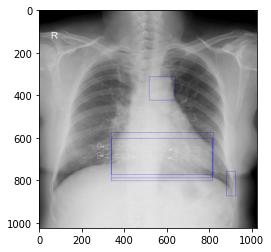

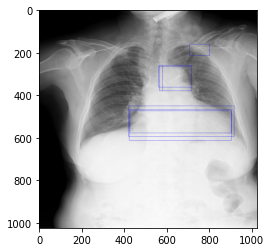

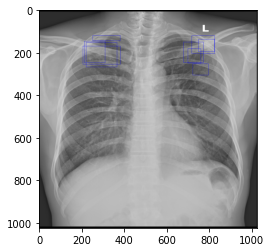

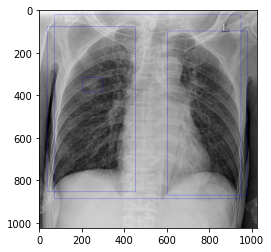

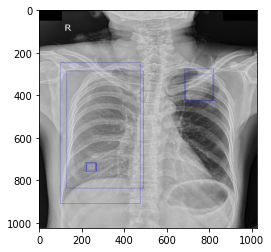

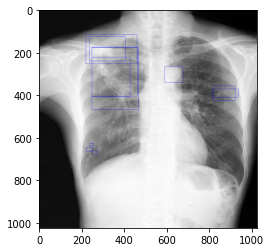

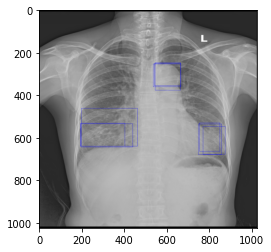

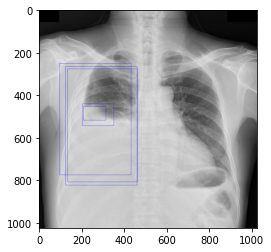

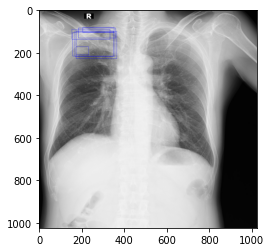

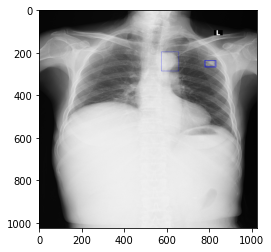

In [ ]:
import cv2
import matplotlib.pyplot as plt

for i in image_data:

  image_path = os.path.join("/content/drive/MyDrive/vinbig_yolo",i)
  label_path = os.path.join("/content/drive/MyDrive/VinBig",i)

  image_path = image_path + ".png"
  label_path = label_path + ".txt"

  img = cv2.imread(image_path)
  dh, dw = 1024, 1024

  fl = open(label_path, 'r')
  data = fl.readlines()
  fl.close()

  for dt in data:

      # Split string to float
      _, x, y, w, h = map(float, dt.split(' '))

      # Taken from https://github.com/pjreddie/darknet/blob/810d7f797bdb2f021dbe65d2524c2ff6b8ab5c8b/src/image.c#L283-L291
      # via https://stackoverflow.com/questions/44544471/how-to-get-the-coordinates-of-the-bounding-box-in-yolo-object-detection#comment102178409_44592380
      l = int((x - w / 2) * dw)
      r = int((x + w / 2) * dw)
      t = int((y - h / 2) * dh)
      b = int((y + h / 2) * dh)
      
      if l < 0:
          l = 0
      if r > dw - 1:
          r = dw - 1
      if t < 0:
          t = 0
      if b > dh - 1:
          b = dh - 1

      cv2.rectangle(img, (l, t), (r, b), (0, 0, 255), 1)

  plt.imshow(img)
  plt.show()

### **JSON file split**

In [ ]:
!git clone https://github.com/akarazniewicz/cocosplit

Cloning into 'cocosplit'...
remote: Enumerating objects: 17, done.
remote: Counting objects: 100% (17/17), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 17 (delta 4), reused 17 (delta 4), pack-reused 0
Unpacking objects: 100% (17/17), done.


In [ ]:
%cd cocosplit/

/content/cocosplit


In [ ]:
!pip install -r requirements.txt

In [ ]:
!python cocosplit.py -s 0.8 /content/all.json train.json test.json

Saved 12000 entries in train.json and 3000 in test.json


## **Convert label to csv format**

In [3]:
import os
count = 0
files = []
yolodir="/content/drive/MyDrive/yolo_result/labels"
for file in os.listdir(yolodir):
    if(file.endswith('.txt')):
      files.append(file)
      count +=1

In [4]:
len(files)

1216

In [ ]:
dict1 = {'image_id': [], 'class_id':[], 'confidence_score':[], 'x_min':[], 'y_min':[], 'x_max':[], 'y_max':[]}
df = pd.DataFrame(dict1)
df

,image_id,class_id,confidence_score,x_min,y_min,x_max,y_max


In [ ]:
count = 0
num_img = 0

for f in files:

  txt_add = '/content/drive/MyDrive/yolo_result/labels/' + f
  num_img +=1

  ## Provide the location of the output .txt file ##
  a_file = open(txt_add, "r")

  # Stripping data from the txt file into a list #
  list_of_lists = []
  for line in a_file:
    stripped_line = line.strip()
    line_list = stripped_line.split()
    list_of_lists.append(line_list)
  a_file.close()

  # Conversion of str to int #
  stage1 = []
  for i in range(0, len(list_of_lists)):
    test_list = list(map(float, list_of_lists[i])) 
    stage1.append(test_list)

  # Denormalizing # 
  stage2 = []
  mul = [1,1024,1024,1024,1024] #[constant, image_width, image_height, image_width, image_height]
  for x in stage1:
    c,xx,yy,w,h, conf = x[0]*mul[0], x[1]*mul[1], x[2]*mul[2], x[3]*mul[3], x[4]*mul[4], x[5]    
    stage2.append([c,xx,yy,w,h, conf])

  # Convert (x_center, y_center, width, height) --> (x_min, y_min, width, height) #
  stage_final = []
  for x in stage2:

    # c,xx,yy,w,h, conf = int(x[0]), (x[1]-(x[3]/2)) , (x[2]-(x[4]/2)), x[3]*1, x[4]*1, x[5]
    c, conf, x_min, y_min = int(x[0]), x[5], (x[1]-(x[3]/2)), (x[2]-(x[4]/2))

    x_max = x_min + x[3]
    y_max = y_min + x[4]
    
    temp = [str(f.split(".")[0]), c, conf, x_min, y_min, x_max, y_max]

    df.loc[len(df.index)] = temp
    
    count +=1


In [ ]:
print(count,num_img)

1566 1216


In [ ]:
df.to_csv('label.csv')

In [ ]:
metadata=pd.read_csv("/content/drive/MyDrive/yolo_result/test_shape.csv")
metadata=pd.DataFrame(metadata.filter(['image_id','height','weight']))
metadata = metadata.rename(columns = {'height': 'Rows', 'weight': 'Columns'}, inplace = False)
metadata.head()

,image_id,Rows,Columns
0,002a34c58c5b758217ed1f584ccbcfe9,2584.0,2345.0
1,004f33259ee4aef671c2b95d54e4be68,3028.0,2517.0
2,008bdde2af2462e86fd373a445d0f4cd,2880.0,2304.0
3,009bc039326338823ca3aa84381f17f1,2430.0,1994.0
4,00a2145de1886cb9eb88869c85d74080,2408.0,2136.0


In [ ]:
data = pd.DataFrame(df.filter(['image_id', 'class_id', 'confidence_score', 'x_min', 'y_min', 'x_max', 'y_max']))
data.head()

,image_id,class_id,confidence_score,x_min,y_min,x_max,y_max
0,3075716fb54707f068e0ecd8d687f799,0.0,0.301758,495.999488,331.999744,603.999744,440.999424
1,3075ea62bfa39a295cbf419b9248401b,3.0,0.301270,459.000320,482.000333,798.000640,580.000307
2,3075ea62bfa39a295cbf419b9248401b,0.0,0.408203,550.000128,284.000256,658.000384,391.000064
3,31446c7e7cae2f7aac75a2a922643474,0.0,0.395752,524.000256,283.999744,637.000704,395.999744
4,309ea022e7179851582a662b97ca9ce4,3.0,0.351074,390.000640,606.000640,853.000192,765.000192


In [ ]:
len(metadata), len(data), data['class_id'].unique()

(3000, 1566, array([ 0.,  3.,  8., 10., 13.]))

In [ ]:
for id in metadata["image_id"]:
  if id not in list(data["image_id"]):

    temp = [str(id), 14, 1.0, 0.0, 0.0, 0.0, 0.0]
    data.loc[len(data.index)] = temp

In [ ]:
len(data), len(data['image_id'].unique())

(3350, 3000)

In [ ]:
df_1=pd.merge(data,metadata,on='image_id')
df_1.head()

,image_id,class_id,confidence_score,x_min,y_min,x_max,y_max,Rows,Columns
0,3075716fb54707f068e0ecd8d687f799,0.0,0.301758,495.999488,331.999744,603.999744,440.999424,2500.0,2048.0
1,3075ea62bfa39a295cbf419b9248401b,3.0,0.301270,459.000320,482.000333,798.000640,580.000307,3000.0,3000.0
2,3075ea62bfa39a295cbf419b9248401b,0.0,0.408203,550.000128,284.000256,658.000384,391.000064,3000.0,3000.0
3,31446c7e7cae2f7aac75a2a922643474,0.0,0.395752,524.000256,283.999744,637.000704,395.999744,2430.0,1994.0
4,309ea022e7179851582a662b97ca9ce4,3.0,0.351074,390.000640,606.000640,853.000192,765.000192,2836.0,2336.0


In [ ]:
len(df_1), len(df_1['image_id'].unique())

(3350, 3000)

In [ ]:
df_1

,image_id,class_id,confidence_score,x_min,y_min,x_max,y_max,Rows,Columns
0,3075716fb54707f068e0ecd8d687f799,0.0,0.301758,495.999488,331.999744,603.999744,440.999424,2500.0,2048.0
1,3075ea62bfa39a295cbf419b9248401b,3.0,0.301270,459.000320,482.000333,798.000640,580.000307,3000.0,3000.0
2,3075ea62bfa39a295cbf419b9248401b,0.0,0.408203,550.000128,284.000256,658.000384,391.000064,3000.0,3000.0
3,31446c7e7cae2f7aac75a2a922643474,0.0,0.395752,524.000256,283.999744,637.000704,395.999744,2430.0,1994.0
4,309ea022e7179851582a662b97ca9ce4,3.0,0.351074,390.000640,606.000640,853.000192,765.000192,2836.0,2336.0
...,...,...,...,...,...,...,...,...,...
3345,ff41bdfc0c7fae671caabbe6dcf071bb,14.0,1.000000,0.000000,0.000000,0.000000,0.000000,2982.0,2715.0
3346,ff425d16ade3f71bb7a6386f2f650cfa,14.0,1.000000,0.000000,0.000000,0.000000,0.000000,3072.0,3072.0
3347,ff490fbf2d5613bc7c8cc13e2c2b1901,14.0,1.000000,0.000000,0.000000,0.000000,0.000000,2500.0,2048.0
3348,ff761085c11792ec5f439f6b74774550,14.0,1.000000,0.000000,0.000000,0.000000,0.000000,2430.0,1994.0


In [ ]:
# df_1['x_min'] = ((df_1['x_min'] / 1024) * df_1['Columns'])
# df_1['y_min'] = ((df_1['y_min'] / 1024) * df_1['Rows'])
# df_1['weight'] = ((df_1['weight'] / 1024) * df_1['Columns'])
# df_1['height'] = ((df_1['height'] / 1024) * df_1['Rows'])

df_1['x_min'] = (df_1['x_min'] / 1024) 
df_1['y_min'] = (df_1['y_min'] / 1024) 
df_1['x_max'] = (df_1['x_max'] / 1024)
df_1['y_max'] = (df_1['y_max'] / 1024)


In [ ]:
df_1

,image_id,class_id,confidence_score,x_min,y_min,x_max,y_max,Rows,Columns
0,3075716fb54707f068e0ecd8d687f799,0.0,0.301758,0.484374,0.324219,0.589843,0.430664,2500.0,2048.0
1,3075ea62bfa39a295cbf419b9248401b,3.0,0.301270,0.448243,0.470703,0.779297,0.566407,3000.0,3000.0
2,3075ea62bfa39a295cbf419b9248401b,0.0,0.408203,0.537110,0.277344,0.642579,0.381836,3000.0,3000.0
3,31446c7e7cae2f7aac75a2a922643474,0.0,0.395752,0.511719,0.277344,0.622071,0.386719,2430.0,1994.0
4,309ea022e7179851582a662b97ca9ce4,3.0,0.351074,0.380860,0.591797,0.833008,0.747070,2836.0,2336.0
...,...,...,...,...,...,...,...,...,...
3345,ff41bdfc0c7fae671caabbe6dcf071bb,14.0,1.000000,0.000000,0.000000,0.000000,0.000000,2982.0,2715.0
3346,ff425d16ade3f71bb7a6386f2f650cfa,14.0,1.000000,0.000000,0.000000,0.000000,0.000000,3072.0,3072.0
3347,ff490fbf2d5613bc7c8cc13e2c2b1901,14.0,1.000000,0.000000,0.000000,0.000000,0.000000,2500.0,2048.0
3348,ff761085c11792ec5f439f6b74774550,14.0,1.000000,0.000000,0.000000,0.000000,0.000000,2430.0,1994.0


In [ ]:
# df_1['x_min'] = (df_1['x_min'] / df_1['Columns'])
# df_1['y_min'] = (df_1['y_min'] / df_1['Rows'])
# df_1['weight'] = (df_1['weight'] / df_1['Columns'])
# df_1['height'] = (df_1['height'] / df_1['Rows'])

In [ ]:
df_1.loc[df_1.class_id == 14.0, "x_max"] = 1.0
df_1.loc[df_1.class_id == 14.0, "y_max"] = 1.0

In [ ]:
df_1

,image_id,class_id,confidence_score,x_min,y_min,x_max,y_max,Rows,Columns
0,3075716fb54707f068e0ecd8d687f799,0.0,0.301758,0.484374,0.324219,0.589843,0.430664,2500.0,2048.0
1,3075ea62bfa39a295cbf419b9248401b,3.0,0.301270,0.448243,0.470703,0.779297,0.566407,3000.0,3000.0
2,3075ea62bfa39a295cbf419b9248401b,0.0,0.408203,0.537110,0.277344,0.642579,0.381836,3000.0,3000.0
3,31446c7e7cae2f7aac75a2a922643474,0.0,0.395752,0.511719,0.277344,0.622071,0.386719,2430.0,1994.0
4,309ea022e7179851582a662b97ca9ce4,3.0,0.351074,0.380860,0.591797,0.833008,0.747070,2836.0,2336.0
...,...,...,...,...,...,...,...,...,...
3345,ff41bdfc0c7fae671caabbe6dcf071bb,14.0,1.000000,0.000000,0.000000,1.000000,1.000000,2982.0,2715.0
3346,ff425d16ade3f71bb7a6386f2f650cfa,14.0,1.000000,0.000000,0.000000,1.000000,1.000000,3072.0,3072.0
3347,ff490fbf2d5613bc7c8cc13e2c2b1901,14.0,1.000000,0.000000,0.000000,1.000000,1.000000,2500.0,2048.0
3348,ff761085c11792ec5f439f6b74774550,14.0,1.000000,0.000000,0.000000,1.000000,1.000000,2430.0,1994.0


In [ ]:
df_1.to_csv('yolo_1.csv')

In [ ]:
df_1.iloc[0][0]

'3075716fb54707f068e0ecd8d687f799'

In [ ]:
dict2 = {'image_id': [], 'PredictionString':[]}
final = pd.DataFrame(dict2)
final

,image_id,PredictionString


In [ ]:
for i in range(3350):
  string = str(int(df_1.iloc[i][1]))
  for j in range(2,7):
    string = string + ' ' + str(df_1.iloc[i][j])
  
  name = str(df_1.iloc[i][0])
  temp = [name, string]

  final.loc[len(final.index)] = temp


In [ ]:
len(final), len(final['image_id'].unique())

(3350, 3000)

In [ ]:
final

,image_id,PredictionString
0,3075716fb54707f068e0ecd8d687f799,0 0.301758 0.48437449999999993 0.3242185 0.589...
1,3075ea62bfa39a295cbf419b9248401b,3 0.30127 0.44824250000000004 0.47070344999999...
2,3075ea62bfa39a295cbf419b9248401b,0 0.408203 0.5371095 0.277344 0.6425785 0.3818...
3,31446c7e7cae2f7aac75a2a922643474,0 0.395752 0.511719 0.2773435 0.622071 0.3867185
4,309ea022e7179851582a662b97ca9ce4,3 0.351074 0.38086 0.5917975 0.833008 0.7470705
...,...,...
3345,ff41bdfc0c7fae671caabbe6dcf071bb,14 1.0 0.0 0.0 1.0 1.0
3346,ff425d16ade3f71bb7a6386f2f650cfa,14 1.0 0.0 0.0 1.0 1.0
3347,ff490fbf2d5613bc7c8cc13e2c2b1901,14 1.0 0.0 0.0 1.0 1.0
3348,ff761085c11792ec5f439f6b74774550,14 1.0 0.0 0.0 1.0 1.0


In [ ]:
final.to_csv('final.csv')

In [ ]:
final.to_csv(r'/content/yolo_output.csv', index=False)